# AttnLRP vs IntegratedGradients

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer

from src.Comparison import Comparison

In [2]:
model_attn       = AutoModelForCausalLM.from_pretrained("gpt2").cuda()
model_integrated = AutoModelForCausalLM.from_pretrained("gpt2").cuda()
tokenizer        = AutoTokenizer.from_pretrained("gpt2", use_fast=True)

In [6]:
from datasets import load_dataset

dataset = load_dataset("rajpurkar/squad_v2")

README.md:   0%|          | 0.00/8.92k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/16.4M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [34]:
def Get_Prompt(idx):
    context  = dataset["train"][idx]["context"]
    question = dataset["train"][idx]["question"]
    answers  = dataset["train"][idx]["answers"]

    return "Contest: " + context +" Question: " + question.rstrip(), answers["text"][0]

# Tests

## Years

In [49]:
prompt="""\
Context: If my name is Mark I am twelve years old, while if my name is Julie I am twenty-two years old. \n \
Question: How old am I if my name is Mark? According to the text, if my name is Mark I am"""

In [50]:
gpt_args = {
            "do_sample": True,
            "max_length": 52,
            "max_new_tokens": 52,
            "temperature": 0.7,
            "top_k": 50,
            "no_repeat_ngram_size": 2,
           }

In [51]:
model_attn.config.is_decoder = True
# set text-generation params under task_specific_params
model_attn.config.task_specific_params["text-generation"] = gpt_args

In [52]:
model_integrated.config.is_decoder = True
# set text-generation params under task_specific_params
model_integrated.config.task_specific_params["text-generation"] = gpt_args

In [53]:
# comp = Comparison(model1, model2, tokenizer)
comp = Comparison(model_attn, model_integrated, tokenizer)

In [ ]:
dictionary, output = comp(prompt, "twelve", gpt_args)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:33, 33.64s/it]                                                                   
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Attributing with integrated_gradients...:  78%|██████████████████████████████▍        | 82/105 [00:05<00:05,  4.19it/s]

In [ ]:
output

AttnLRP


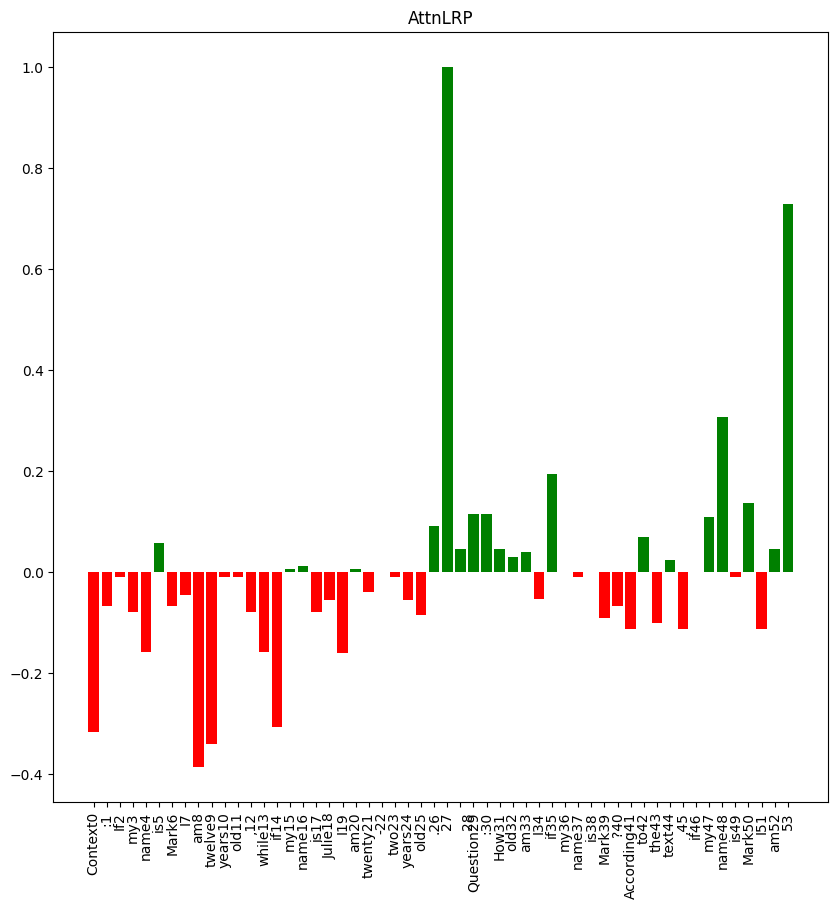

Integrated_Gradients


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (54,) and arg 1 with shape (52,).

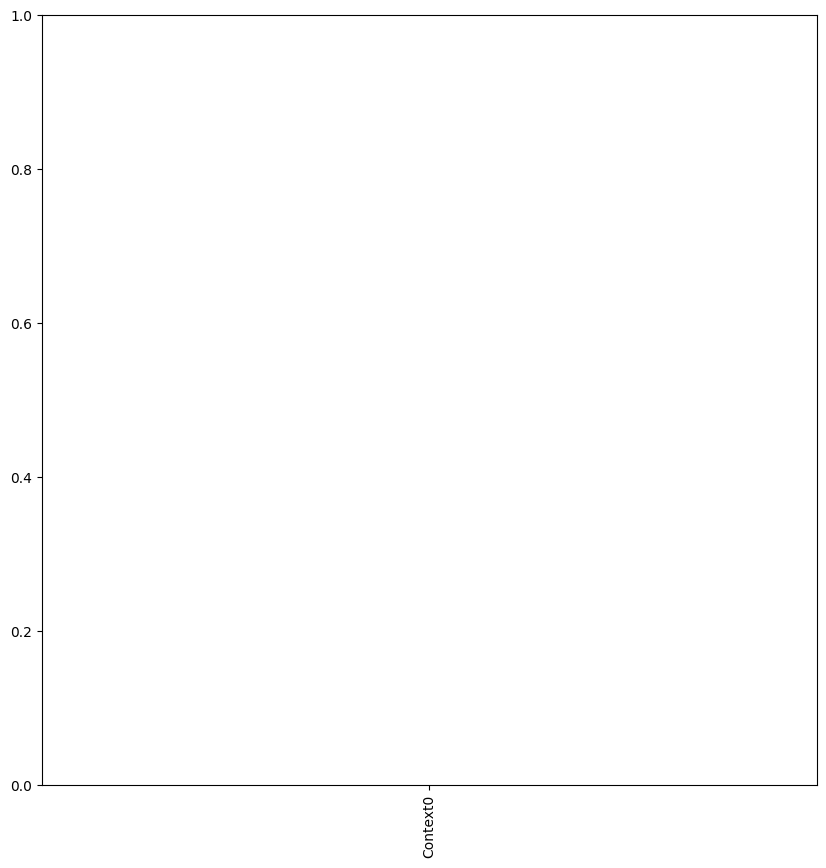

In [9]:
comp.plot(dictionary)

In [ ]:
comp.to_pdf(dictionary, name="")

## Everest

In [12]:
prompt = """\
Context: Mount Everest attracts many climbers. After the first reconnaissance expedition by the British in 1921 reached 7,000 m (22,970 ft) on the North Col, the 1922 expedition pushed the north ridge route up to 8,320 m (27,300 ft), marking the first time a human had climbed above 8,000 m (26,247 ft). \
Question: How high did they climb in 1922? According to the text, the 1922 expedition reached"""

In [13]:
gpt_args = {
            "do_sample": True,
            "max_length": 100,
            "max_new_tokens": 100,
            "temperature": 0.7,
            "top_k": 50,
            "no_repeat_ngram_size": 2,
           }

In [14]:
model_attn.config.is_decoder = True
# set text-generation params under task_specific_params
model_attn.config.task_specific_params["text-generation"] = gpt_args

In [15]:
model_integrated.config.is_decoder = True
# set text-generation params under task_specific_params
model_integrated.config.task_specific_params["text-generation"] = gpt_args

In [16]:
# comp = Comparison(model1, model2, tokenizer)
comp = Comparison(model_attn, model_integrated, tokenizer)

In [17]:
dictionary, output = comp(prompt, "8",  gpt_args)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [01:02, 62.79s/it]                                                                   
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Attributing with integrated_gradients...: 100%|██████████████████████████████████████| 192/192 [00:42<00:00,  2.36it/s]
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Attributing with input_x_gradient...: 100%|██████████████████████████████████████████| 192/192 [00:02<00:00, 37.61it/s]
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `atten

In [18]:
output

'Context: Mount Everest attracts many climbers. After the first reconnaissance expedition by the British in 1921 reached 7,000 m (22,970 ft) on the North Col, the 1922 expedition pushed the north ridge route up to 8,320 m (27,300 ft), marking the first time a human had climbed above 8,000 m (26,247 ft). Question: How high did they climb in 1922? According to the text, the 1922 expedition reached the summit of Mount Everest at 7,000 m (22,970 ft) on the North Col. The expedition was led by Sir John W. Campbell, a British climber who had been in the Himalayas for more than a century. The expedition was led by Sir John W. Campbell, a British climber who had been in the Himalayas for more than a century. The expedition was led by Sir John W. Campbell, a British climber who had been in the Himalayas for more than a century.'

AttnLRP


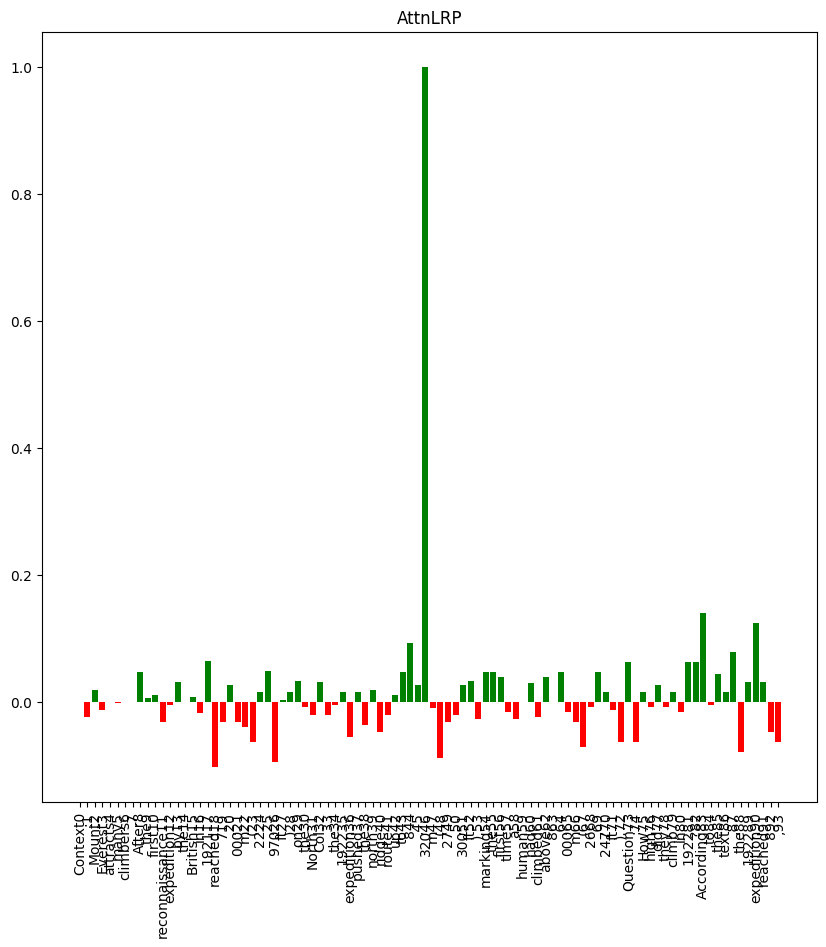

Integrated_Gradients


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (94,) and arg 1 with shape (52,).

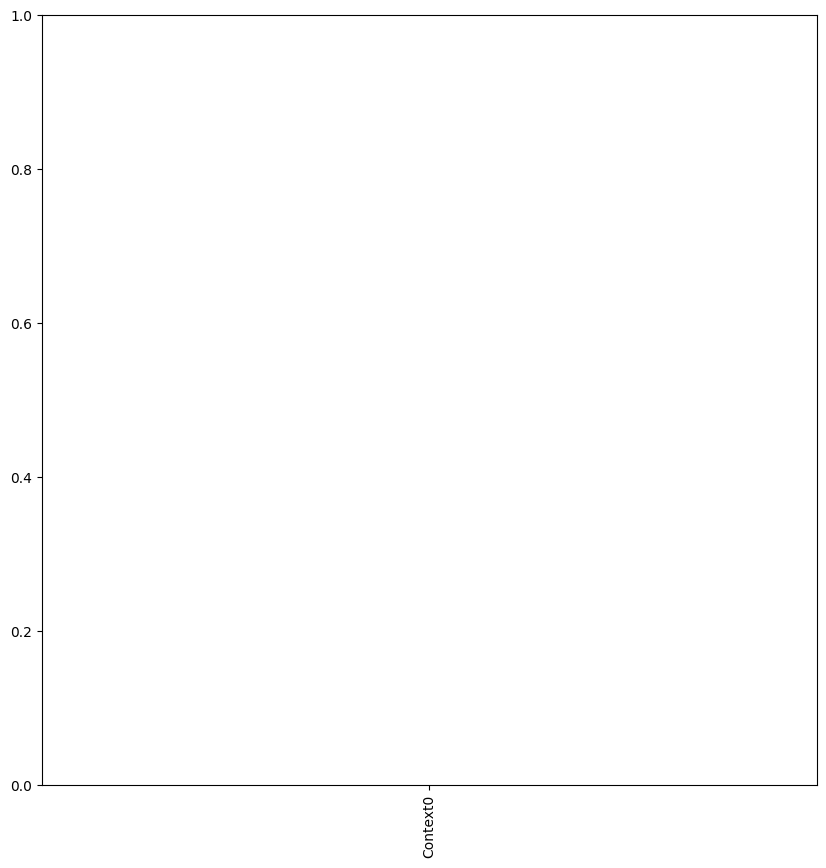

In [16]:
comp.plot(dictionary)

In [19]:
comp.to_pdf(dictionary, name="2")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./2AttnLRP.tex
LaTeX2e <2024-06-01> patch level 2
L3 programming layer <2024-10-09>

(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/latex/standalone/standa
lone.cls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone

(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/latex/tools/shellesc.st
y)
(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/generic/iftex/ifluatex.
sty
(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/generic/iftex/iftex.sty
))
(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.s
ty
(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/generic/xkeyval/xkeyval
.tex
(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/generic/xkeyval/xkvutil
s.tex
(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/generic/xkeyval/keyval.
tex))))


## Beyonce

In [36]:
prompt, target = Get_Prompt(3)

In [37]:
gpt_args = {
            "do_sample": True,
            "max_length": 100,
            "max_new_tokens": 100,
            "temperature": 0.7,
            "top_k": 50,
            "no_repeat_ngram_size": 2,
           }

In [38]:
model_attn.config.is_decoder = True
# set text-generation params under task_specific_params
model_attn.config.task_specific_params["text-generation"] = gpt_args

In [39]:
model_integrated.config.is_decoder = True
# set text-generation params under task_specific_params
model_integrated.config.task_specific_params["text-generation"] = gpt_args

In [40]:
# comp = Comparison(model1, model2, tokenizer)
comp = Comparison(model_attn, model_integrated, tokenizer)

In [41]:
dictionary, output = comp(prompt, target, gpt_args)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [01:38, 98.72s/it]                                                                   
/u/dssc/stumino/.local/lib/python3.9/site-packages/transformers/generation/configuration_utils.py:774: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_attentions` is. When `return_dict_in_generate` is not `True`, `output_attentions` is ignored.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
`GPT2SdpaAttention` is used but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attent

In [42]:
target

'Houston, Texas'

In [43]:
output

'Contest: Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy". Question: In what city and state did Beyonce  grow up?\n\nAnswer: Houston, Texas.\n\n'

In [47]:
for key in dictionary.keys():
    print(key)
    print(dictionary[key][0].shape)
    print(dictionary[key][1].shape)

AttnLRP
(190,)
(190,)
Integrated_Gradients
(190,)
(190,)
Gradient_X_Input
(190,)
(190,)
DeepLift
(190,)
(190,)
Gradient_Shap
(190,)
(190,)
Lime
(190,)
(190,)
Shap
(190,)
torch.Size([100])


AttnLRP


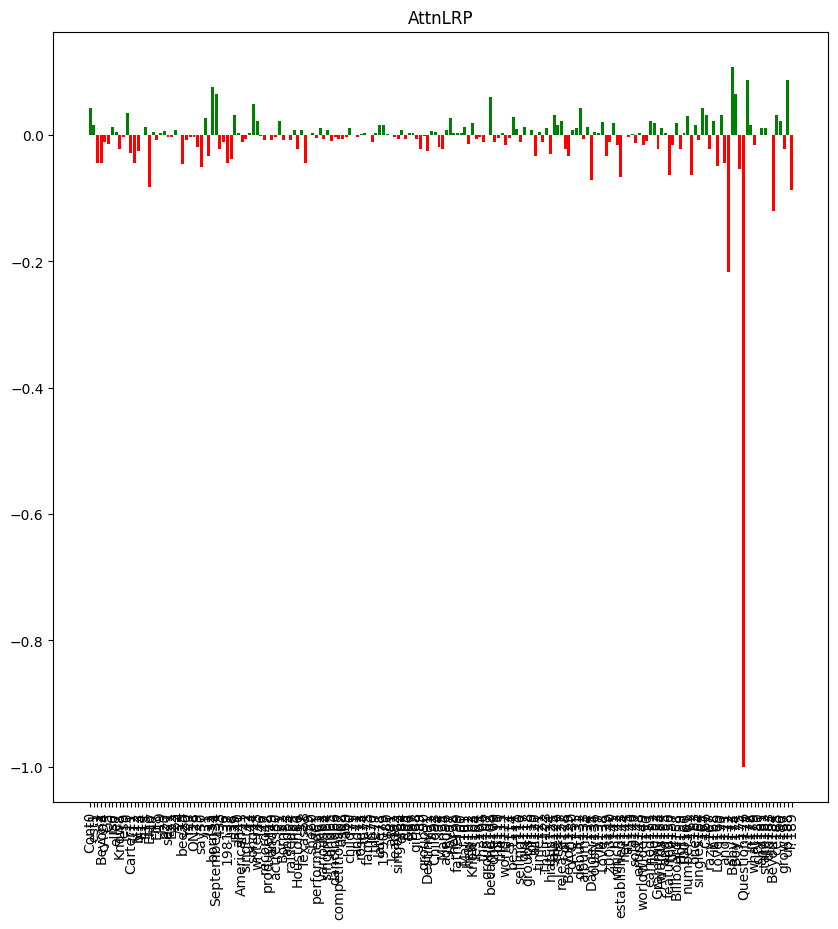

Integrated_Gradients


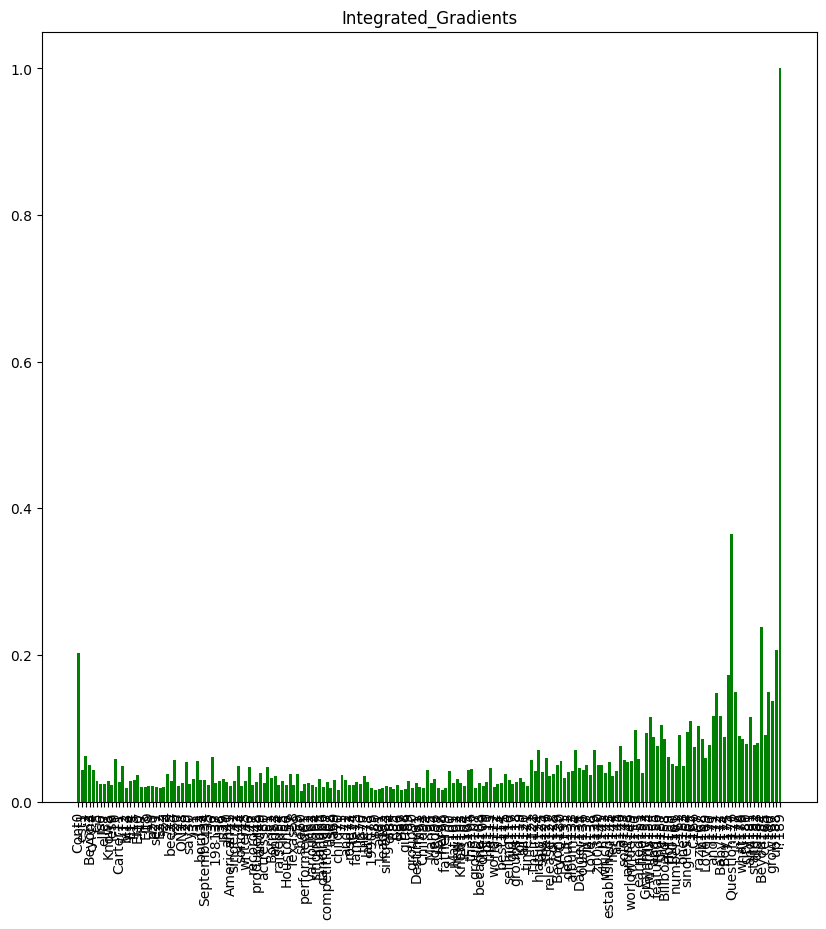

Gradient_X_Input


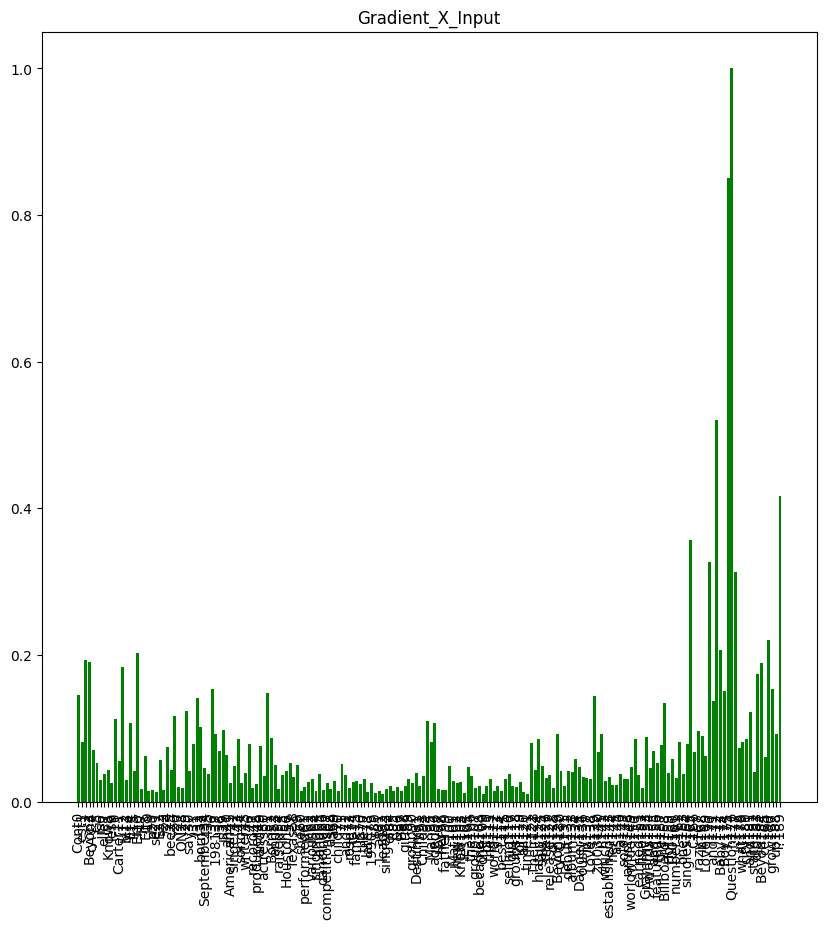

DeepLift


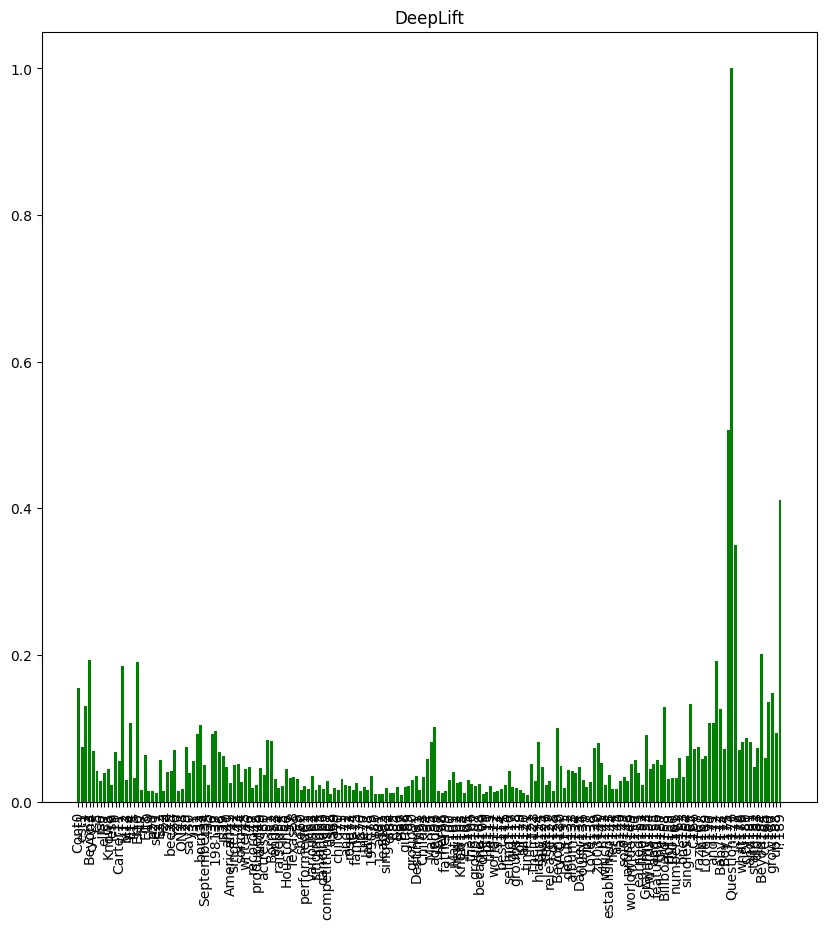

Gradient_Shap


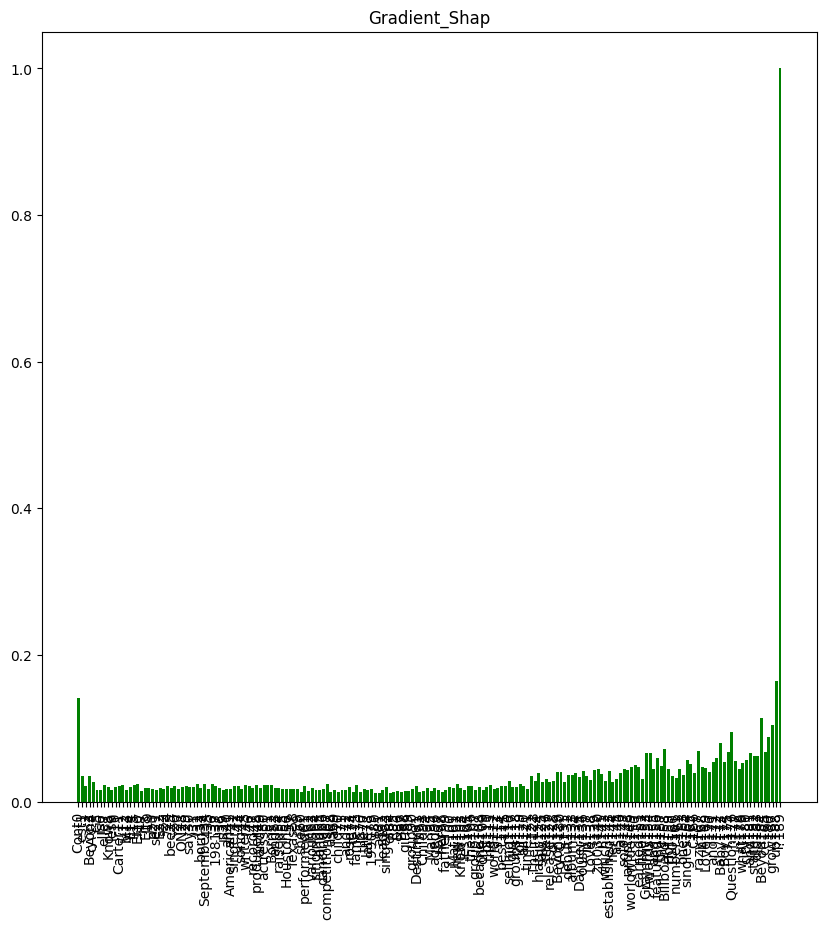

Lime


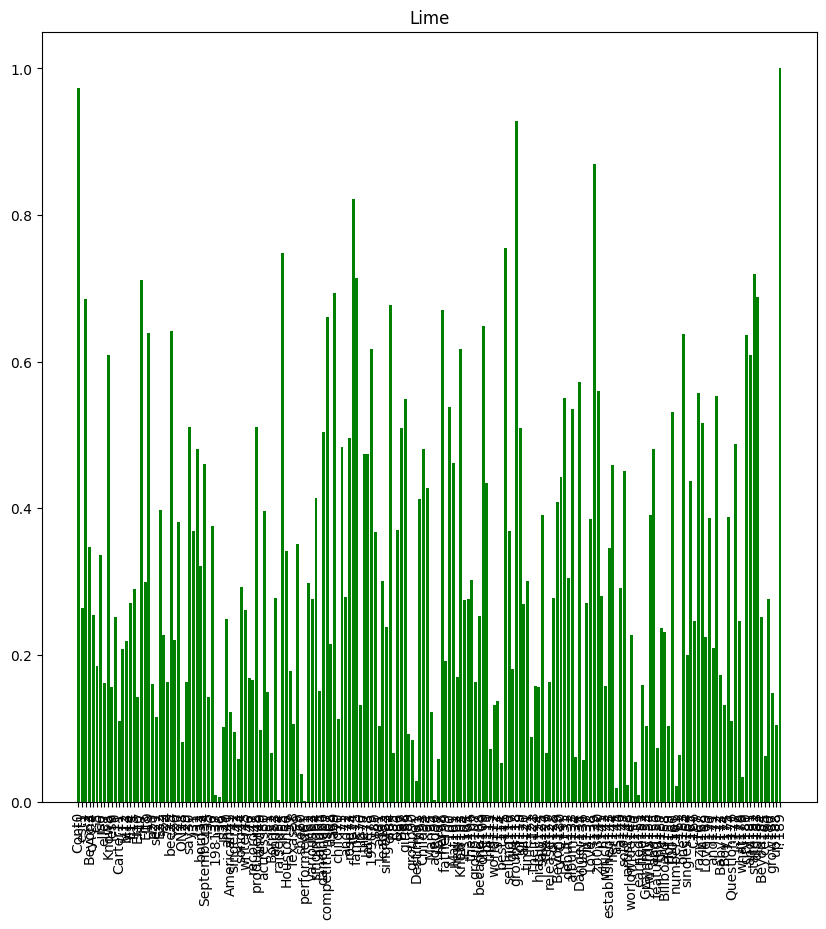

Shap


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (190,) and arg 1 with shape (100,).

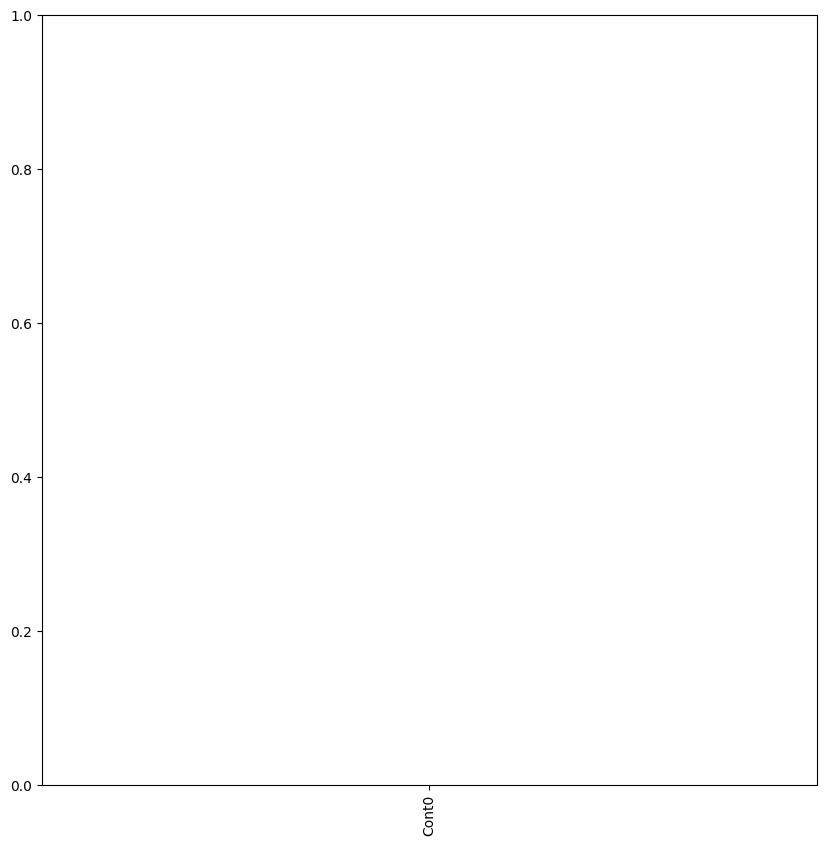

In [48]:
comp.plot(dictionary)

In [46]:
comp.to_pdf(dictionary, name="Beyonce")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./BeyonceAttnLRP.tex
LaTeX2e <2024-06-01> patch level 2
L3 programming layer <2024-10-09>

(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/latex/standalone/standa
lone.cls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone

(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/latex/tools/shellesc.st
y)
(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/generic/iftex/ifluatex.
sty
(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/generic/iftex/iftex.sty
))
(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.s
ty
(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/generic/xkeyval/xkeyval
.tex
(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/generic/xkeyval/xkvutil
s.tex
(/orfeo/cephfs/home/dssc/stumino/texlive/texmf-dist/tex/generic/xkeyval/keyval.
te